<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch4_1_~_3_142p~181p_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 딥러닝 텐서플로 ch4.1 ~ 3 142p~181p 필사

## 01. 합성곱 신경망

합성곱 신경망 CNN : 데이터가 가진 특징들의 패턴을 학습하는 알고리즘 : 이미지 분류, 객체 탐지, 스타일 전이

1-1 이미지 표현

화소 - 숫자: 이미지 강도

1-2 합성곱

합성곱 연산 : 입력 이미지에 대해 정방형 크기를 가지는 커널 사용해 입력 이미지에 대한 특성 추출 방법

특성맵 : 합성곱 연산을 통해 추출된 이미지

입력 이미지와 커널이 겹치는 부분에 대해 합성곱 연산 수행

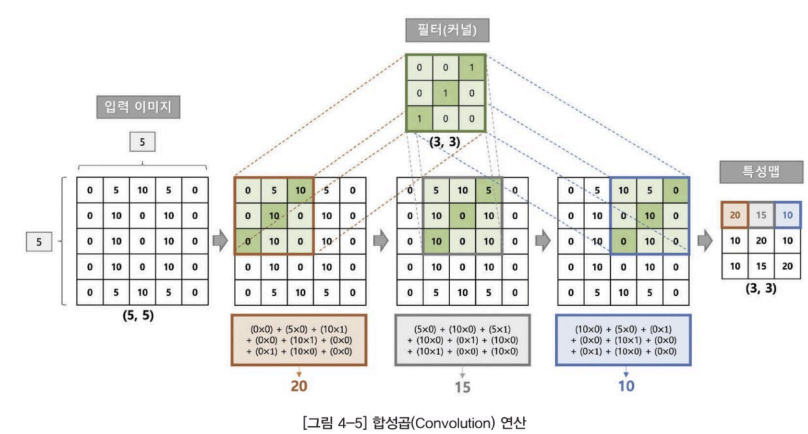

합성곱 신경망이 이미지 특성 추출에 효율적 이유: 커널의 공유 가중치 / 오차 역전파시 완전 연결층 사용할때보다 연산량 훨씬 적

1-3 채널

채점: 입력 이미지를 구성하는 2차원 배열 개수

입력 이미지 채널 개수만큼 커널 생성, 각 채널마다 하나씩 커널 적용해 합성곱 연산 수행
-> 입력 이미지 채널 개수만큼 합성곱 연산 결과 생성, ELEMENT-WISE 덧셈 연산으로 모두 더해주면 최종 특성맵 생성

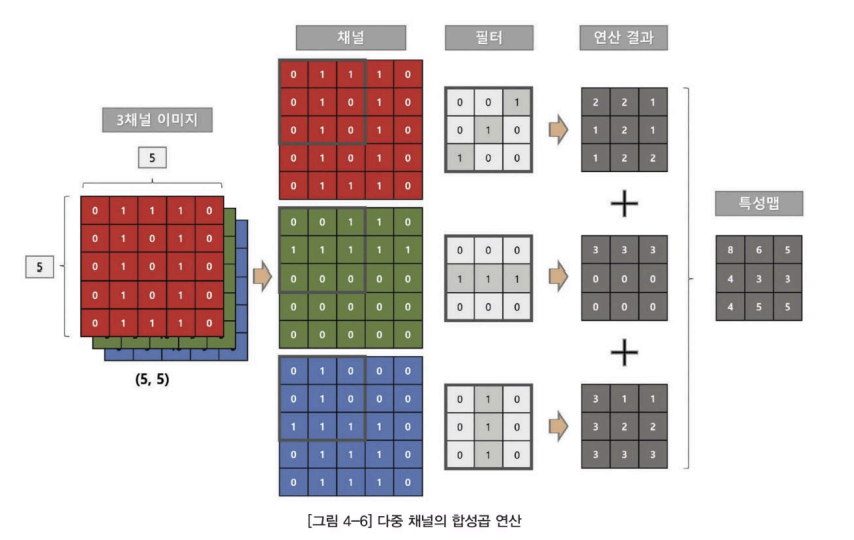

1-4 스트라이드

커널 좌측 상단으로부터 입력 이미지 기준으로 우측으로 이동하면서 합성곱 연산 수행하고 특성맵에 결과 채워나감 -> 이동 간격 : 스트라이드

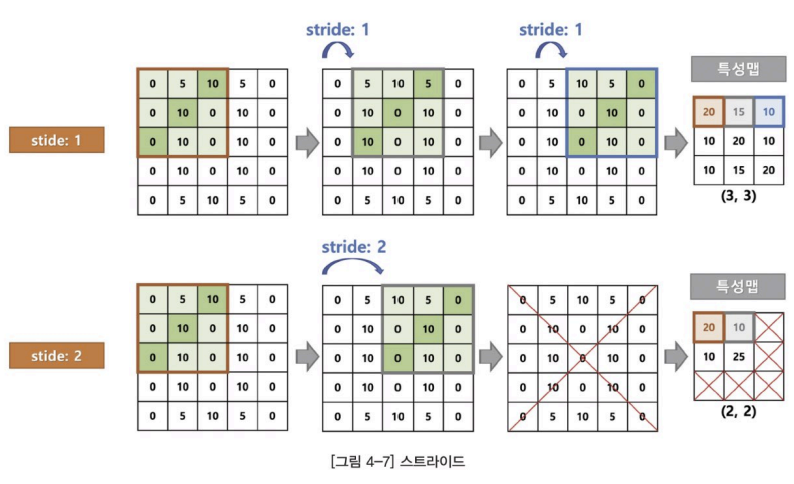

1-5 패딩

추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정

zero-padding : 입력이미지 가장자리 0으로 채워진 패딩 값으로 채운 후 추출

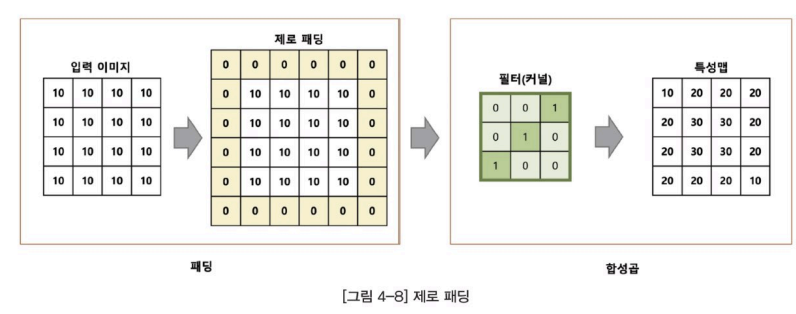

1-6 특성맵 사이즈

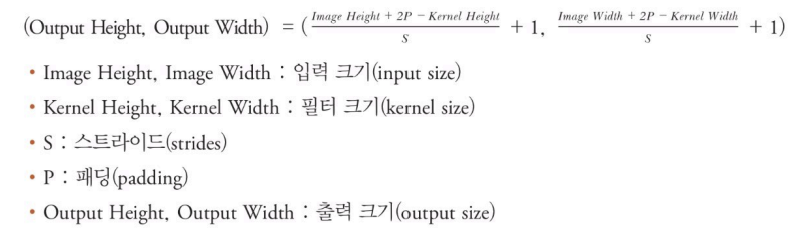

1-7 폴링

폴링 레이어 : 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어 : 과대적합 방지

-> 최대풀링(특징 값이 큰 값이 다른 특징들을 대표한다는 개념), 평균풀링

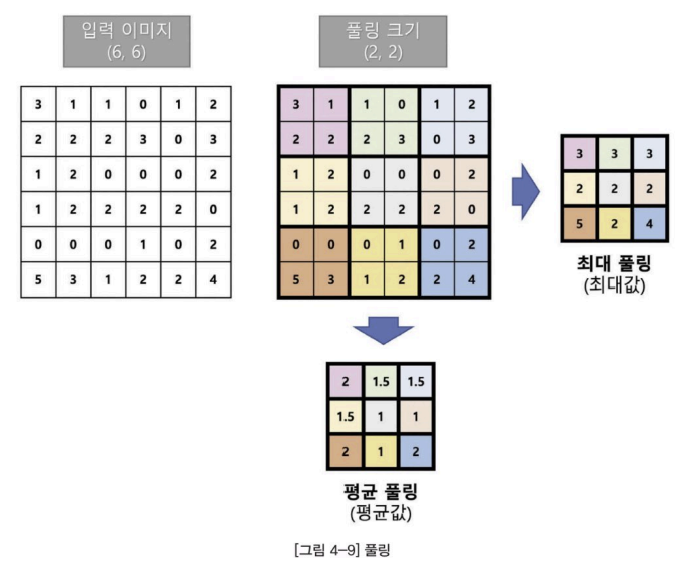



2. 간단한 모델 생성

2-1 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


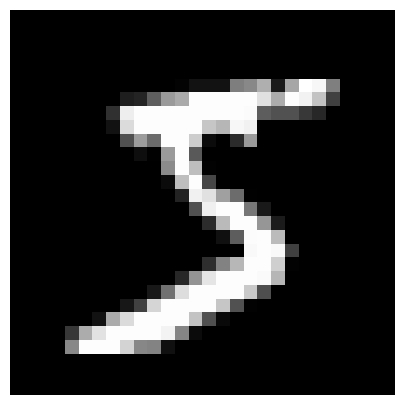

In [2]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap="gray")
  plt.axis("off")
  plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [3]:
# 정규화(normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [5]:
# 채널 추가
print(x_train.shape, x_valid.shape)
x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]
print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


2-2 sequential API 로 모델 생성 및 학습

합성곱 레이어 1개, 풀링 레이어 1개 적용하는 모델

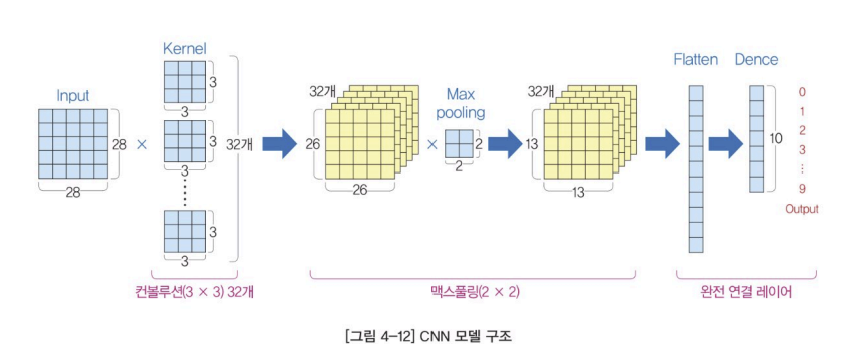

풀링 레이어는 (2,2) 크기로 최대 풀링 적용, 레이어 이름 속성도 추가, 최종 분류기는 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수 10으로 하고 분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax 적용

In [6]:
# sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    # max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.2353 - accuracy: 0.9331 - val_loss: 0.1118 - val_accuracy: 0.9665
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0889 - accuracy: 0.9746 - val_loss: 0.0657 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0651 - accuracy: 0.9806 - val_loss: 0.0616 - val_accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0524 - accuracy: 0.9847 - val_loss: 0.0616 - val_accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0531 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0510 - val_accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0556 -

In [8]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 5ms/step - loss: 0.0574 - accuracy: 0.9833


[0.05738217011094093, 0.983299970626831]

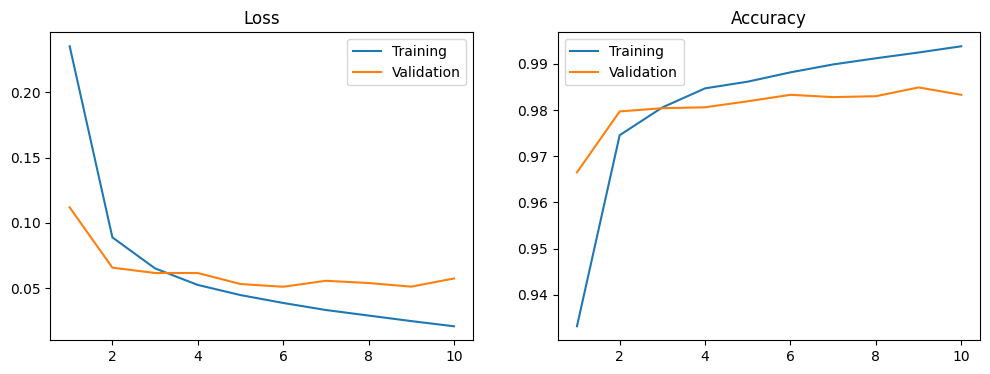

In [9]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12,4))
  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

2-3 모델 구조 파악



In [10]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# 입력 텐서 형태
print(model.input)

# 출력 텐서 형태
print(model.output)

#레이어
print(model.layers)

# 첫번째 레이어 선택
print(model.layers[0])

# 첫 번째 레이어 입력
print(model.layers[0].input)

# 첫 번째 레이어 출력
print(model.layers[0].output)

# 첫 번째 레이어 가중치
print(model.layers[0].get_weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv_input'), name='conv_input', description="created by layer 'conv_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense/Softmax:0', description="created by layer 'dense'")
[<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d872131b5e0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7d8724907460>, <keras.src.layers.reshaping.flatten.Flatten object at 0x7d87213621d0>, <keras.src.layers.core.dense.Dense object at 0x7d8721362470>]
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv_input'), name='conv_input', description="created by layer 'conv_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv/Relu:0', description="created by layer 'conv'")
<bound method Layer.get_weights of <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d87213

In [12]:
# 첫번째 레이어 커널 가중치
print(model.layers[0].kernel)

# 첫번째 레이어 바이어스 가중치
print(model.layers[0].bias)

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 2.61709750e-01,  5.03580924e-03, -8.30147922e-01,
          -7.51731813e-01,  2.45160848e-01,  1.83330163e-01,
           1.99644819e-01, -8.26667845e-01,  2.97773689e-01,
          -2.33013868e-01, -3.94511670e-01, -4.89372879e-01,
           4.09456104e-01, -1.33991528e+00,  3.14469010e-01,
          -9.23044443e-01, -7.93233633e-01,  1.49156824e-01,
           3.95207316e-01, -7.48066843e-01, -1.81064099e-01,
          -4.99821931e-01,  1.60309196e-01,  4.07121241e-01,
          -5.72102904e-01, -1.01248376e-01,  3.58564913e-01,
           9.80767980e-02, -6.04740202e-01, -4.30777103e-01,
          -1.33166477e-01,  5.96893430e-02]],

        [[ 6.57090902e-01, -3.73975821e-02, -7.70603597e-01,
          -6.53598309e-01,  2.01916844e-01, -5.24362206e-01,
           2.71904111e-01, -1.94732979e-01,  1.00102173e-02,
          -1.30004987e-01, -6.25708759e-01, -1.27834991e-01,
           2.56818663e-02, -

In [13]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫번쨰, 두번째 레이어)
activator = tf.keras.models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 109ms/step


2

In [14]:
# 첫번쨰 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

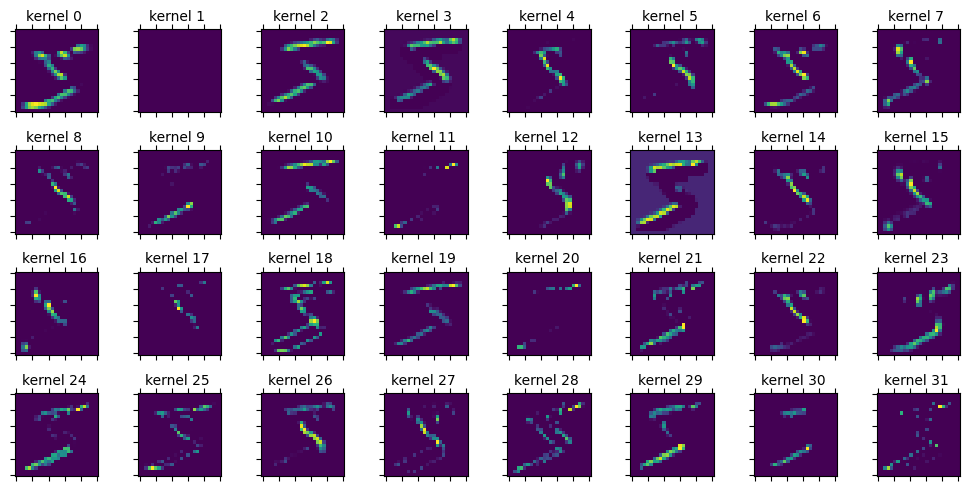

In [15]:
# convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)
for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s '%str(i),fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [16]:
# 두번째 레이어(pool) 출력층
pooling_activation = activations[1]
pooling_activation.shape

(1, 13, 13, 32)

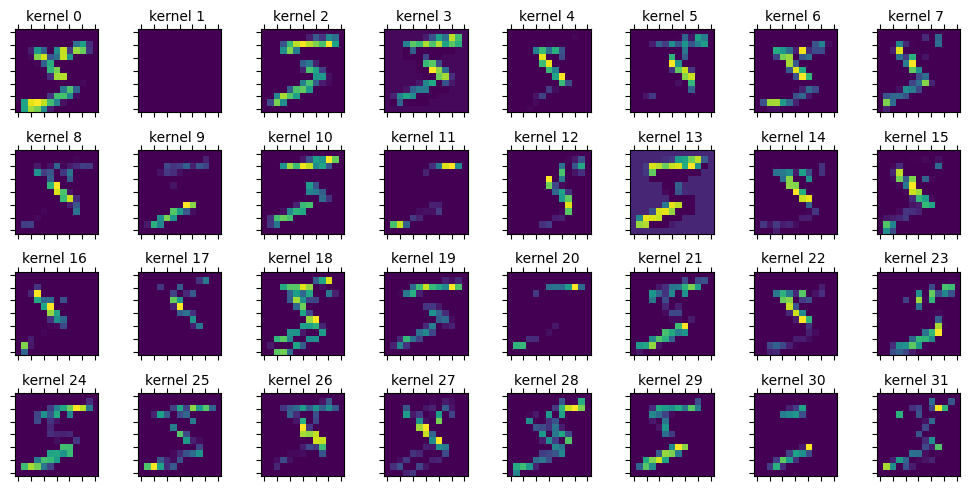

In [17]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s '%str(i),fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

03. 복잡한 모델 생성

ex: 각 레이어 기준으로 입력 2개이상, 출력 2개이상인 모델

3-1 데이터셋 준비

In [18]:
import tensorflow as tf
import numpy as np

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


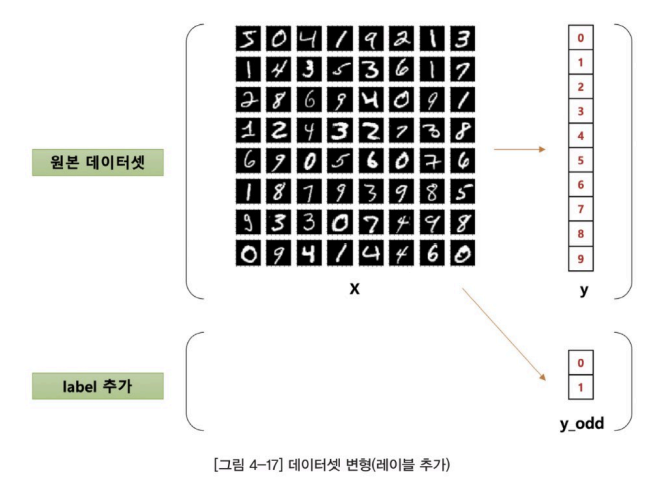

In [19]:
# 새로운 출력 값 배열 생성(홀수: 1, 짝수:0)
y_train_odd = []
for y in y_train:
    if y % 2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [20]:
print(y_train[:10])
print(y_train_odd[:10])

# validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2 == 0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


(10000,)

In [21]:
# 정규화(normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


3-2 Functional API 로 다중입력, 다중출력 레이어 생성



In [22]:
# Functional API 를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPool2D(2,2)(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 16)           160       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 2704)                 0         ['max_pooling2d[0][0]'] 

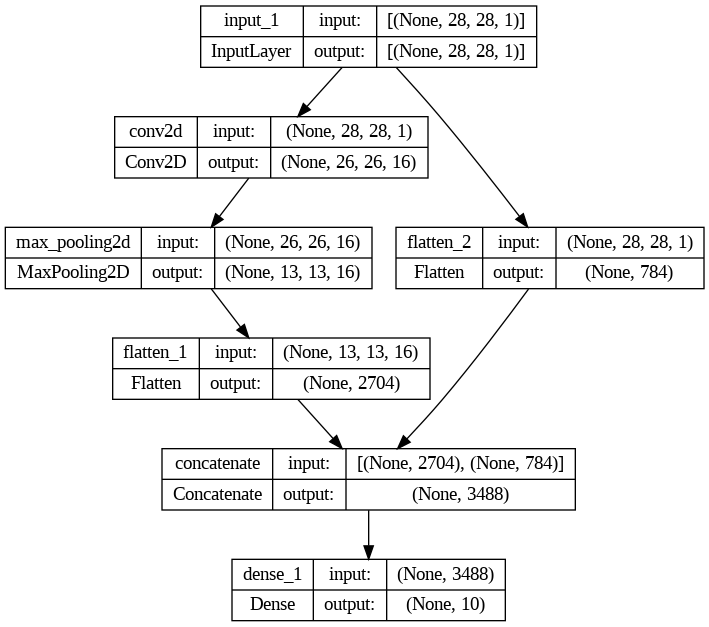

In [23]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [24]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, epochs=10, validation_data=(x_valid_in, y_valid))

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2534 - accuracy: 0.9285 - val_loss: 0.1156 - val_accuracy: 0.9676
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0937 - accuracy: 0.9732 - val_loss: 0.0764 - val_accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0694 - accuracy: 0.9795 - val_loss: 0.0628 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0567 - accuracy: 0.9833 - val_loss: 0.0587 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0564 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0615 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0358 - accuracy: 0.9892 - val_loss: 0.0555 - va

3-3 다중 출력 분류 모델

In [30]:
# Functional API 를 사용해 모델 생성
inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPool2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)
odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [31]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


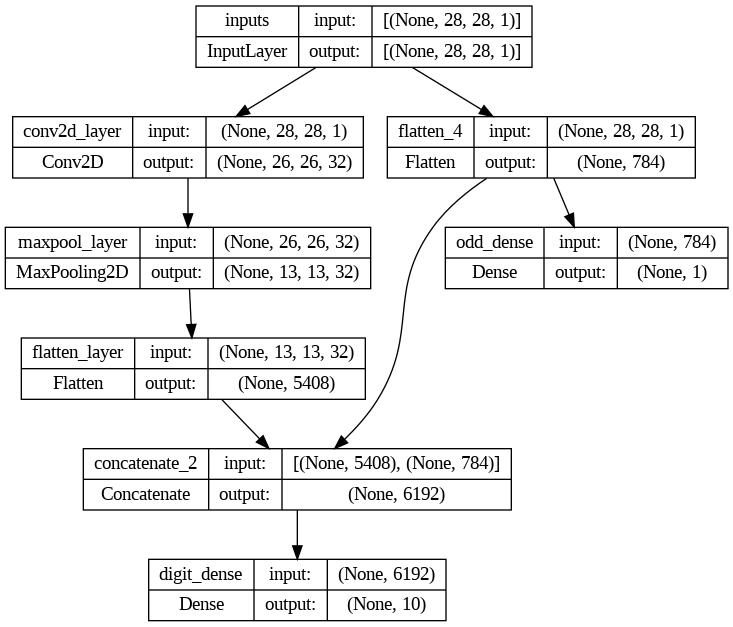

In [32]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_output_cnn.png')

- 지정 이름 key, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정

In [33]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss=1.0 * sparse_categorical_crossentropy +0.5 *binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3753 - digit_dense_loss: 0.2125 - odd_dense_loss: 0.3255 - digit_dense_accuracy: 0.9380 - odd_dense_accuracy: 0.8651 - val_loss: 0.2328 - val_digit_dense_loss: 0.0951 - val_odd_dense_loss: 0.2755 - val_digit_dense_accuracy: 0.9723 - val_odd_dense_accuracy: 0.8872
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2172 - digit_dense_loss: 0.0815 - odd_dense_loss: 0.2713 - digit_dense_accuracy: 0.9763 - odd_dense_accuracy: 0.8910 - val_loss: 0.2004 - val_digit_dense_loss: 0.0685 - val_odd_dense_loss: 0.2637 - val_digit_dense_accuracy: 0.9791 - val_odd_dense_accuracy: 0.8976
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1918 - digit_dense_loss: 0.0605 - odd_dense_loss: 0.2626 - digit_dense_accuracy: 0.9820 - odd_dense_accuracy: 0.8958 - val_loss: 0.1978 - val_digit_dense_loss: 0.0683 - val_odd_dense_loss: 0.2589 - val_digit_dense_accuracy: 0.9787 -

In [34]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 1s 4ms/step - loss: 0.1871 - digit_dense_loss: 0.0592 - odd_dense_loss: 0.2557 - digit_dense_accuracy: 0.9837 - odd_dense_accuracy: 0.9002


[0.1870926171541214,
 0.05924044921994209,
 0.2557043135166168,
 0.9836999773979187,
 0.9002000093460083]

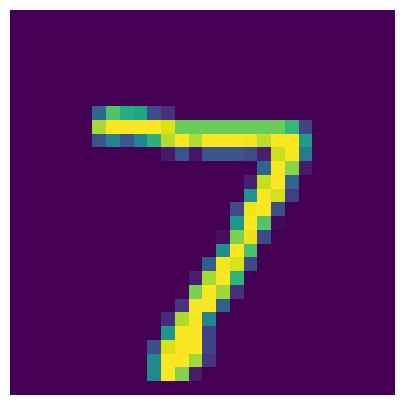

In [35]:
#검증 데이터셋의 인덱스0에 해당하는 이미지 출력
#샘플이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [36]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])


313/313 [==============================] - 1s 4ms/step
[4.3355415e-14 3.5640810e-11 8.7875076e-09 3.7184952e-07 5.9215453e-13
 8.3407689e-13 6.5649488e-21 9.9999958e-01 6.9341394e-10 8.4579579e-09]
[0.99965805]


In [37]:
digit_labels = np.argmax(digit_preds, axis=-1)
print(digit_labels[0:10])

[7 2 1 0 4 1 4 9 5 9]


In [39]:
odd_labels = (odd_preds > 0.5).astype(np.int64).reshape(1,-1)[0]
print(odd_labels[0:10])

[1 0 1 0 0 1 0 1 0 1]


3-4 전이학습

전이학습 : 기존에 학습된 모델을 활용해 새로운 모델을 만들어내는 개념



In [40]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


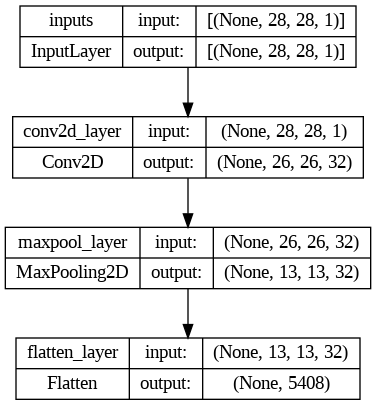

In [41]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [42]:
#sequential API 적용
digit_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


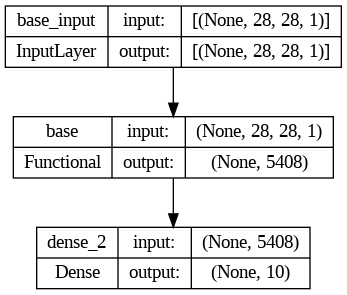

In [43]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [44]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련
history = digit_model.fit(x_train_in, y_train, epochs=10, validation_data=(x_valid_in, y_valid))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1340 - accuracy: 0.9627 - val_loss: 0.0672 - val_accuracy: 0.9779
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0604 - accuracy: 0.9819 - val_loss: 0.0575 - val_accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0457 - accuracy: 0.9864 - val_loss: 0.0532 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0521 - val_accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0625 - val_accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0492 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0553 -

In [45]:
# 베이스 모델의 가중치 고정(freeze model)

base_model_frozen = tf.keras.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


dense functional api를 적용해 구성

-> flatten 레이어 이전에 존재하는 conv2d 레이어의 파라미터 320개 포함되지 않게 됨

In [46]:
#functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [47]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, epochs=10, validation_data=(x_valid_in, y_valid))


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1187 - accuracy: 0.9686 - val_loss: 0.0553 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0493 - accuracy: 0.9855 - val_loss: 0.0487 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0357 - accuracy: 0.9896 - val_loss: 0.0504 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0508 - val_accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0491 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0519 - val_ac

In [48]:
# 베이스 모델의 conv2d 레이어의 가중치만 고정(freeze layer)
base_model_frozen2 = tf.keras.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [49]:
#functional API 적용
dense_output2 = tf.keras.layers.Dense(10,activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [50]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, epochs=10, validation_data=(x_valid_in, y_valid))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1203 - accuracy: 0.9673 - val_loss: 0.0573 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0501 - accuracy: 0.9854 - val_loss: 0.0535 - val_accuracy: 0.9823
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0363 - accuracy: 0.9893 - val_loss: 0.0521 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0474 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0579 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.0560 - val_accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0158 - accuracy: 0.9956 - val_loss: 0.0523 - val_ac